In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
from shapely.geometry import Point
from fiona.crs import from_epsg
import geopandas as gpd
import pysal as ps
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
eth_df = pd.read_csv('ethnicity_full.csv')

In [3]:
gender_names = pd.read_csv('ethnicity_full_gender.csv')

In [4]:
garbage_names = ['---', '?','.','??ry', '?E' , '?i', '*', '%', '=','.','A']
pat = '|'.join(['({})'.format(re.escape(c)) for c in garbage_names])

clean_names_df = gender_names[~gender_names['name'].str.contains(pat)]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [5]:
clean_names_df['FirstName_clean'] = clean_names_df['name'].astype('str').map(lambda x: re.sub('[^a-zA-Z]+', '', x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
clean_names_df.head()

,Unnamed: 0,name,proportion_male,proportion_female,gender,year_min,year_max,FirstName_clean
13038,13039,'George,1.0,0.0,male,1830,1860,George
13039,13040,'George,1.0,0.0,male,1830,1860,George
13040,13041,'George,1.0,0.0,male,1830,1860,George
13041,13042,'George,1.0,0.0,male,1830,1860,George
13042,13043,'George,1.0,0.0,male,1830,1860,George


In [7]:
clean_names_df['name_len'] = clean_names_df['FirstName_clean'].map(lambda x: len(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
clean_names_df_gender = clean_names_df[clean_names_df['name_len'] >= 3][['FirstName_clean','gender']]

In [9]:
eth_df.head()

,Unnamed: 0,LastName,FirstName,validSince,$.data.occupation,geometry,race
0,0,nee,ae,1849,NaN,NaN,"Asian,GreaterEastAsian,EastAsian"
1,1,Pope,James,1849,mason,"{""type"":""Point"",""coordinates"":[-74.00276988744...","GreaterEuropean,British"
2,2,Pope,John,1849,grocer,NaN,"GreaterEuropean,British"
3,3,Pope,Joseph,1849,soda water,"{""type"":""Point"",""coordinates"":[-73.99623423814...","GreaterEuropean,British"
4,4,Pope,John,1849,(col'd) porter,NaN,"GreaterEuropean,British"


In [10]:
names_eth = eth_df[['FirstName', 'validSince', '$.data.occupation', 'race']]
names_eth.rename(columns = {'$.data.occupation' : 'occupation'}, inplace = True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [11]:
#filter out null names
#filter out names with lenght <=2

names_eth['fname_clean'] = names_eth['FirstName'].astype('str').map(lambda x: re.sub('[^a-zA-Z]+', '', x))
filter_null =  names_eth[names_eth['fname_clean'] != '']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
filter_null['name_len'] = filter_null['fname_clean'].map(lambda x: len(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
names_ethnicity = filter_null[filter_null['name_len'] >= 3]

In [14]:
names_ethnicity.head()

,FirstName,validSince,occupation,race,fname_clean,name_len
1,James,1849,mason,"GreaterEuropean,British",James,5
2,John,1849,grocer,"GreaterEuropean,British",John,4
3,Joseph,1849,soda water,"GreaterEuropean,British",Joseph,6
4,John,1849,(col'd) porter,"GreaterEuropean,British",John,4
5,Joshua,1849,mer,"GreaterEuropean,British",Joshua,6


In [15]:
clean_names_df_gender.head()

,FirstName_clean,gender
13038,George,male
13039,George,male
13040,George,male
13041,George,male
13042,George,male


In [16]:
males = clean_names_df_gender[clean_names_df_gender['gender'] == 'male']
females = clean_names_df_gender[clean_names_df_gender['gender'] == 'female']


In [17]:
males['FirstName_clean'] = males['FirstName_clean'].astype('str').map(lambda x : x.lower())
females['FirstName_clean'] = females['FirstName_clean'].astype('str').map(lambda x : x.lower())

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
males_list = males['FirstName_clean'].unique().tolist()
females_list = females['FirstName_clean'].unique().tolist()

In [19]:
female_dict = {k: "female" for k in females_list}
male_dict = {k: "male" for k in males_list}

In [20]:
male_dict.update(female_dict)

In [21]:
names_ethnicity['gender'] = names_ethnicity['fname_clean'].astype('str').map(lambda x: male_dict[x.lower()] if x.lower() in male_dict.keys() else "unknown")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
names_ethnicity.head()

,FirstName,validSince,occupation,race,fname_clean,name_len,gender
1,James,1849,mason,"GreaterEuropean,British",James,5,male
2,John,1849,grocer,"GreaterEuropean,British",John,4,male
3,Joseph,1849,soda water,"GreaterEuropean,British",Joseph,6,male
4,John,1849,(col'd) porter,"GreaterEuropean,British",John,4,male
5,Joshua,1849,mer,"GreaterEuropean,British",Joshua,6,male


In [23]:
females_eth = names_ethnicity[names_ethnicity['gender'] == 'female']

In [24]:
females_eth.dropna(inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
females_nonwid = females_eth[~females_eth ['occupation'].str.contains("wid")]
females_nonwid['occ_clean'] = females_nonwid['occupation'].astype('str').map(lambda x: re.sub('[^a-zA-Z]+', '', x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [26]:
females_nonwid['occ_clean'] = females_nonwid['occ_clean'].str.replace('dressmkr', 'dressmaker')
females_nonwid['occ_clean'] = females_nonwid['occ_clean'].str.replace('bdgh', 'boardinghouse')


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [103]:
females_nonwid['occ_clean'] = females_nonwid['occ_clean'].str.replace('bagh', 'boardinghouse')
females_nonwid['occ_clean'] = females_nonwid['occ_clean'].str.replace('boardingh', 'boardinghouse')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [106]:
females_nonwid['occ_clean'] = females_nonwid['occ_clean'].str.replace('boardinghouseouse', 'boardinghouse')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


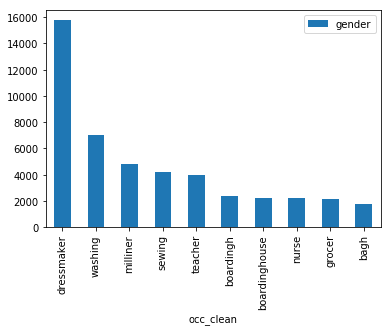

In [28]:
females_nonwid[['occ_clean', 'gender']].groupby(['occ_clean']).count().sort_values('gender',ascending=False)[0:10].plot(kind='bar')

In [137]:
females_nonwid[['gender','validSince']].groupby(['validSince']).count()

,gender
validSince,
1849,1434
1850,1439
1851,1946
1852,2235
1853,2668
1854,3018
1855,3255
1856,3103
1857,3166


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


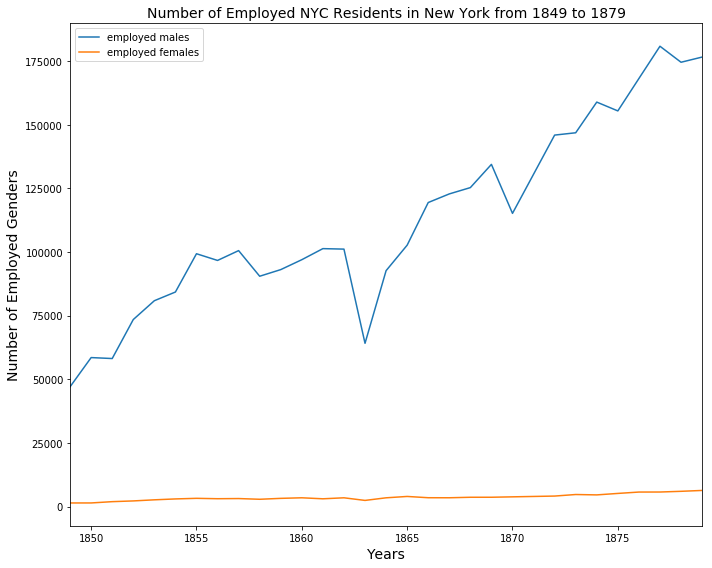

In [138]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.plot([year for year in range(1850,1860)],cumulative_counts,linewidth=3.0)
males_eth[['gender','validSince']].groupby(['validSince']).count().plot(ax=ax,label='employed males')
females_nonwid[['gender','validSince']].groupby(['validSince']).count().plot(ax=ax,label='employed females')
plt.xlabel('Years',fontsize=14.0)
plt.title('Number of Employed NYC Residents in New York from 1849 to 1879', fontsize=14.0)
plt.ylabel('Number of Employed Genders',fontsize=14.0)
ax.legend(["employed males", "employed females"]);
plt.savefig('num_business_genders.png')

In [107]:
top10_occupations = females_nonwid[['occ_clean', 'gender']].groupby(['occ_clean']).count().sort_values('gender',ascending=False)[0:10].index.tolist()

In [108]:
#replace dressmakr --> dressmaker ; bdgh --> boardinghouse boarding--boardinghouse ; milliner -->millinery
top10_occupations


['dressmaker',
 'washing',
 'boardinghouse',
 'milliner',
 'sewing',
 'teacher',
 'nurse',
 'grocer',
 'seamstress',
 'fancygds']

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.plot([year for year in range(1850,1860)],cumulative_counts,linewidth=3.0)
males_eth[['gender','validSince']].groupby(['validSince']).count().plot(ax=ax,label='employed males')
females_nonwid[['gender','validSince']].groupby(['validSince']).count().plot(ax=ax,label='employed females')
plt.xlabel('Years',fontsize=14.0)
plt.ylabel('Number of Employed Genders',fontsize=14.0)
plt.xticks(arange(1850,1860),fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.title('Number of Employed NYC Residents in New York from 1850 to 1859', fontsize=14.0)

ax.legend(["employed females", "employed males"]);
plt.savefig('num_business_genders.png')

In [109]:
females_nonwid_top10 = females_nonwid[females_nonwid['occ_clean'].isin(top10_occupations)]

In [110]:
occ_gb_year = females_nonwid_top10[['occ_clean','validSince','gender']].groupby(['occ_clean','validSince']).count()

In [111]:
occ_gb_race = females_nonwid_top10[['occ_clean','validSince','race']].groupby(['occ_clean','race']).count()

In [112]:
occ_gb_race.reset_index(inplace=True)

In [113]:
occ_gb_year.reset_index(inplace=True)

In [114]:
occ_gb_year.head()

,occ_clean,validSince,gender
0,boardinghouse,1849,2
1,boardinghouse,1850,2
2,boardinghouse,1852,106
3,boardinghouse,1853,240
4,boardinghouse,1854,273


In [115]:
occ_gb_race.head()

,occ_clean,race,validSince
0,boardinghouse,"Asian,GreaterEastAsian,EastAsian",35
1,boardinghouse,"Asian,IndianSubContinent",13
2,boardinghouse,"GreaterAfrican,Africans",27
3,boardinghouse,"GreaterAfrican,Muslim",24
4,boardinghouse,"GreaterEuropean,British",5624


In [116]:
pivot_df = occ_gb_year.pivot(columns='validSince', index='occ_clean', values='gender')

In [117]:
pivot_df_race = occ_gb_race.pivot(columns='race', index='occ_clean', values='validSince')

In [118]:
pivot_df_race.head()

race,"Asian,GreaterEastAsian,EastAsian","Asian,GreaterEastAsian,Japanese","Asian,IndianSubContinent","GreaterAfrican,Africans","GreaterAfrican,Muslim","GreaterEuropean,British","GreaterEuropean,EastEuropean","GreaterEuropean,Jewish","GreaterEuropean,WestEuropean,French","GreaterEuropean,WestEuropean,Germanic","GreaterEuropean,WestEuropean,Hispanic","GreaterEuropean,WestEuropean,Italian","GreaterEuropean,WestEuropean,Nordic"
occ_clean,,,,,,,,,,,,,
boardinghouse,35.0,NaN,13.0,27.0,24.0,5624.0,28.0,260.0,148.0,63.0,38.0,81.0,63.0
dressmaker,45.0,11.0,67.0,22.0,90.0,12823.0,114.0,1049.0,633.0,385.0,138.0,196.0,195.0
fancygds,4.0,NaN,10.0,4.0,8.0,1285.0,19.0,174.0,41.0,53.0,11.0,16.0,32.0
grocer,18.0,NaN,3.0,10.0,15.0,1715.0,12.0,158.0,40.0,99.0,20.0,20.0,75.0
milliner,15.0,1.0,19.0,14.0,41.0,3749.0,45.0,427.0,184.0,133.0,52.0,105.0,56.0


In [119]:
pivot_df_race.columns

Index(['Asian,GreaterEastAsian,EastAsian', 'Asian,GreaterEastAsian,Japanese',
       'Asian,IndianSubContinent', 'GreaterAfrican,Africans',
       'GreaterAfrican,Muslim', 'GreaterEuropean,British',
       'GreaterEuropean,EastEuropean', 'GreaterEuropean,Jewish',
       'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Germanic',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Nordic'],
      dtype='object', name='race')

In [120]:
pivot_df_race.rename(columns = {'Asian,GreaterEastAsian,EastAsian' : 'EastAsian',
                                'Asian,GreaterEastAsian,Japanese' : 'Japanese',
                                'Asian,IndianSubContinent' : 'IndianSubcontinent',
                               'GreaterAfrican,Africans' : 'Africans',
                               'GreaterEuropean,British' : 'British',
                               'GreaterEuropean,EastEuropean' : 'EastEuropean',
                               'GreaterEuropean,Jewish' : 'Jewish',
                               'GreaterEuropean,WestEuropean,French' : 'French',
                               'GreaterEuropean,WestEuropean,Germanic' : 'Germanic',
                               'GreaterEuropean,WestEuropean,Hispanic' : 'Hispanic',
                               'GreaterEuropean,WestEuropean,Italian' : 'Italian',
                               'GreaterEuropean,WestEuropean,Nordic' : 'Nordic'},inplace=True )

In [121]:
pivot_df_race.fillna(0,inplace=True)

In [122]:
pivot_df.fillna(0,inplace=True)

In [123]:
pivot_df_prop = pivot_df / pivot_df.sum(axis = 0)

In [124]:
pivot_df_race_prop = pivot_df_race / pivot_df_race.sum(axis = 0)

In [125]:
pivot_df_prop

validSince,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,...,1869,1870,1872,1873,1874,1875,1876,1877,1878,1879
occ_clean,,,,,,,,,,,,,,,,,,,,,
boardinghouse,0.004890,0.004444,0.000000,0.123256,0.189125,0.187114,0.015422,0.137017,0.137052,0.131186,...,0.157834,0.118982,0.127591,0.131317,0.139060,0.151119,0.124501,0.122170,0.123718,0.120514
dressmaker,0.369193,0.391111,0.376997,0.302326,0.288416,0.267992,0.374188,0.293717,0.252066,0.263943,...,0.288018,0.297731,0.324275,0.334714,0.439962,0.381173,0.385118,0.393475,0.417635,0.367139
fancygds,0.002445,0.011111,0.001597,0.004651,0.004728,0.004112,0.000812,0.000000,0.000000,0.000786,...,0.077189,0.063641,0.077844,0.065037,0.000475,0.000000,0.000726,0.001664,0.000342,0.000000
grocer,0.036675,0.033333,0.031949,0.030233,0.020489,0.025360,0.026786,0.025738,0.033747,0.045562,...,0.034562,0.034864,0.040534,0.041839,0.046037,0.038413,0.056624,0.056258,0.055024,0.067172
milliner,0.227384,0.188889,0.127796,0.105814,0.085894,0.080877,0.117695,0.125662,0.116391,0.162608,...,0.095622,0.069729,0.062183,0.061309,0.072615,0.081891,0.070054,0.058921,0.059467,0.053342
nurse,0.119804,0.128889,0.108626,0.059302,0.062254,0.064428,0.072240,0.074186,0.056474,0.062844,...,0.021889,0.037078,0.027637,0.024441,0.029426,0.048966,0.048276,0.041611,0.029733,0.039183
seamstress,0.068460,0.057778,0.132588,0.117442,0.104807,0.124743,0.103896,0.118092,0.088154,0.077769,...,0.000576,0.000000,0.000000,0.000000,0.000000,0.000422,0.000000,0.000000,0.000000,0.000000
sewing,0.017115,0.006667,0.019169,0.010465,0.017336,0.015079,0.019481,0.016654,0.033058,0.036921,...,0.169355,0.168235,0.159834,0.106048,0.091125,0.085690,0.092922,0.094208,0.076213,0.114587
teacher,0.095355,0.120000,0.086262,0.102326,0.076438,0.064428,0.125000,0.133989,0.144628,0.089552,...,0.055876,0.065302,0.045601,0.055510,0.064547,0.059519,0.065336,0.056591,0.085099,0.099111


In [126]:
pivot_df_prop.T

occ_clean,boardinghouse,dressmaker,fancygds,grocer,milliner,nurse,seamstress,sewing,teacher,washing
validSince,,,,,,,,,,
1849,0.004890,0.369193,0.002445,0.036675,0.227384,0.119804,0.068460,0.017115,0.095355,0.058680
1850,0.004444,0.391111,0.011111,0.033333,0.188889,0.128889,0.057778,0.006667,0.120000,0.057778
1851,0.000000,0.376997,0.001597,0.031949,0.127796,0.108626,0.132588,0.019169,0.086262,0.115016
1852,0.123256,0.302326,0.004651,0.030233,0.105814,0.059302,0.117442,0.010465,0.102326,0.144186
1853,0.189125,0.288416,0.004728,0.020489,0.085894,0.062254,0.104807,0.017336,0.076438,0.150512
1854,0.187114,0.267992,0.004112,0.025360,0.080877,0.064428,0.124743,0.015079,0.064428,0.165867
1855,0.015422,0.374188,0.000812,0.026786,0.117695,0.072240,0.103896,0.019481,0.125000,0.144481
1856,0.137017,0.293717,0.000000,0.025738,0.125662,0.074186,0.118092,0.016654,0.133989,0.074943
1857,0.137052,0.252066,0.000000,0.033747,0.116391,0.056474,0.088154,0.033058,0.144628,0.138430


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


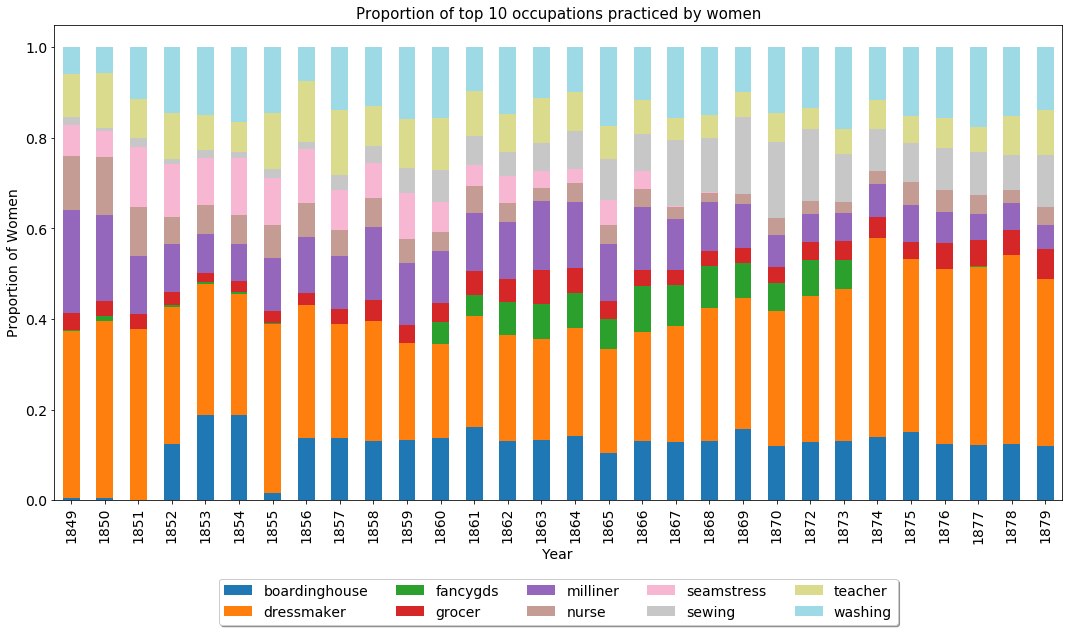

In [127]:
fig, ax =plt.subplots(figsize=(15,8))
box = ax.get_position()

pivot_df_prop.T.plot.bar(ax=ax,stacked=True,colormap='Vega20')
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5,fontsize=14.0)
plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)

plt.title('Proportion of top 10 occupations practiced by women', fontsize=15.0)
plt.xlabel('Year',fontsize=14.0)
plt.ylabel('Proportion of Women',fontsize=14.0)
plt.savefig('genders_occupations_time.png')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


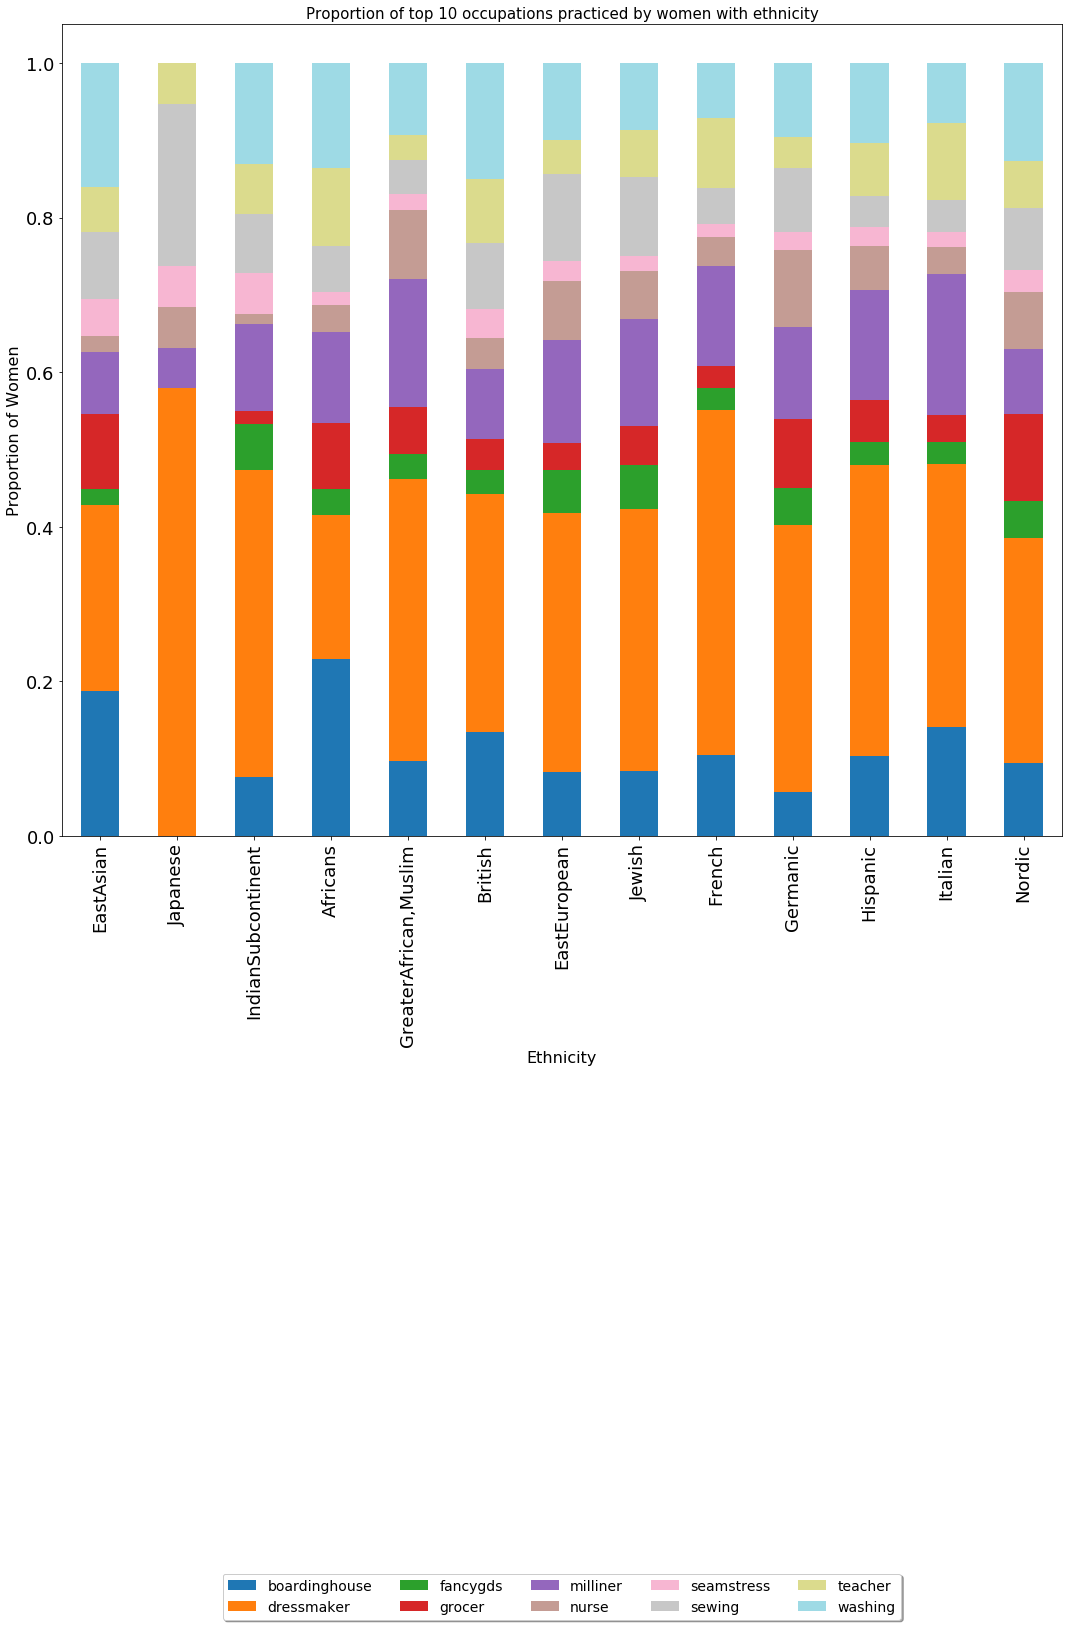

In [128]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
fig, ax =plt.subplots(figsize=(15,15))
box = ax.get_position()

pivot_df_race_prop.T.plot.bar(ax=ax,stacked=True,colormap='Vega20')
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.9),
          fancybox=True, shadow=True, ncol=5,fontsize=14.0)
plt.xticks(fontsize=18.0)
plt.yticks(fontsize=18.0)

plt.title('Proportion of top 10 occupations practiced by women with ethnicity', fontsize=15.0)
plt.xlabel('Ethnicity',fontsize=16.0)
plt.ylabel('Proportion of Women',fontsize=16.0)
plt.savefig('genders_occupations_time_ethnicity_short.png')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


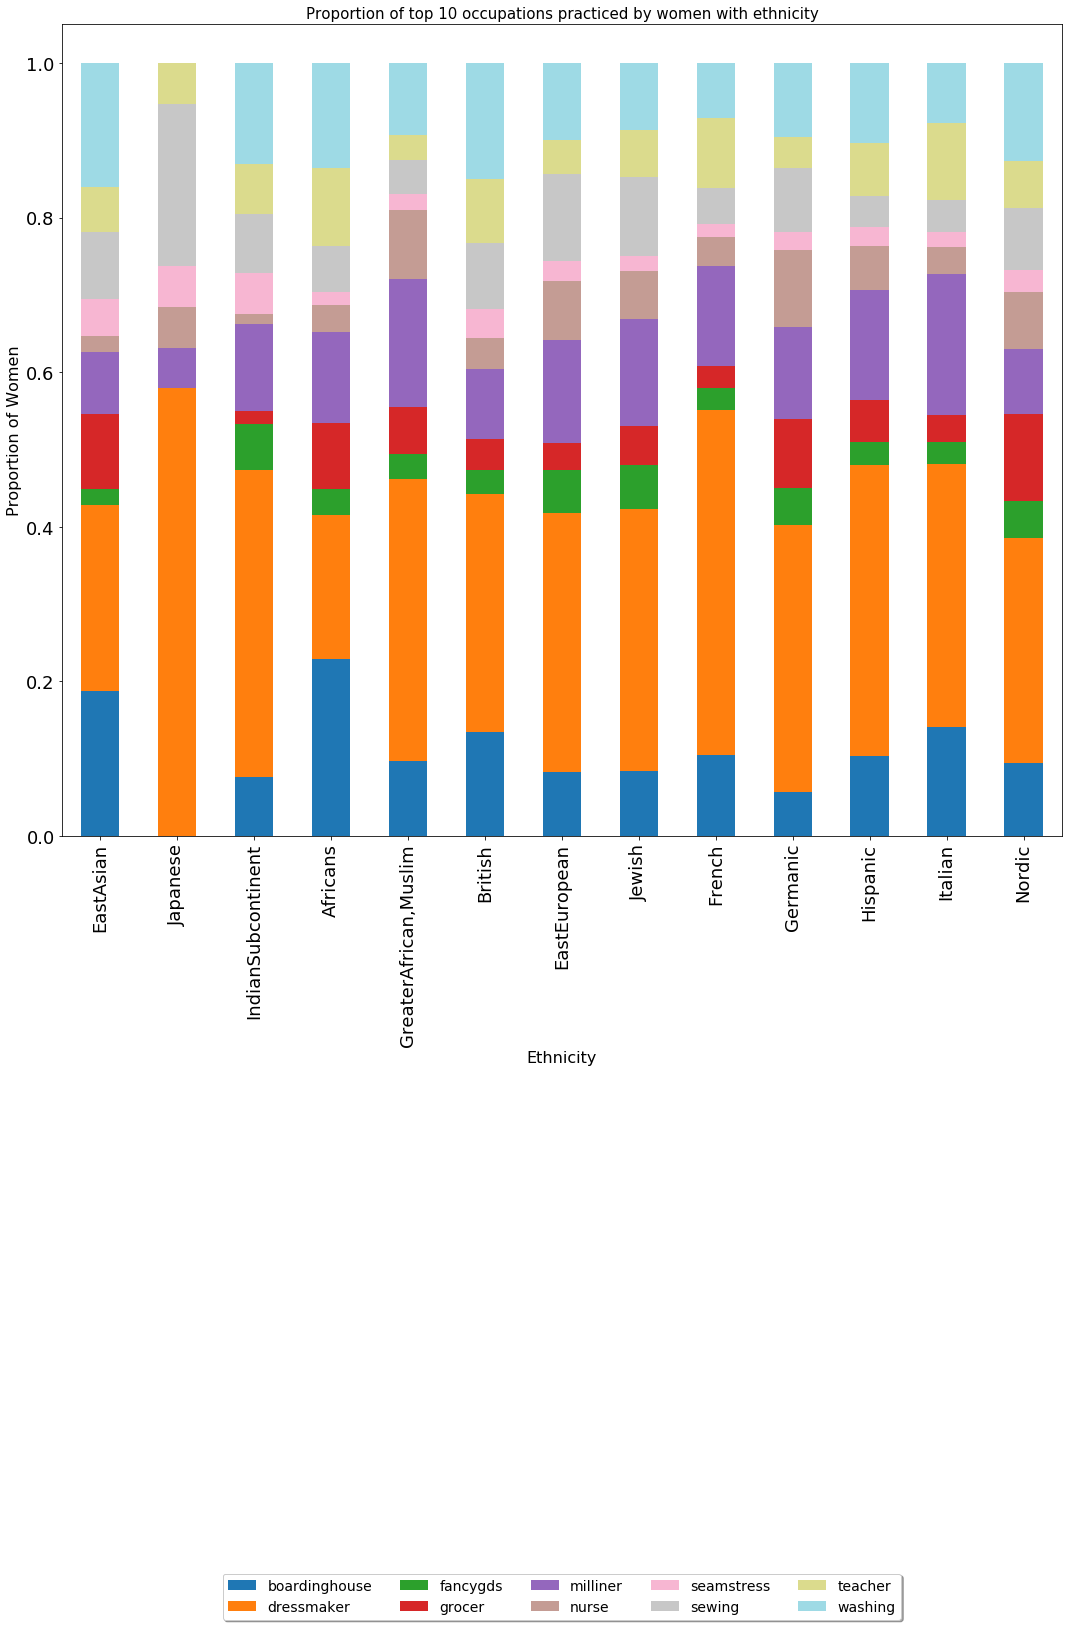

In [129]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
fig, ax =plt.subplots(figsize=(15,15))
box = ax.get_position()

pivot_df_race_prop.T.plot.bar(ax=ax,stacked=True,colormap='Vega20')
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.9),
          fancybox=True, shadow=True, ncol=5,fontsize=14.0)
plt.xticks(fontsize=18.0)
plt.yticks(fontsize=18.0)

plt.title('Proportion of top 10 occupations practiced by women with ethnicity', fontsize=15.0)
plt.xlabel('Ethnicity',fontsize=16.0)
plt.ylabel('Proportion of Women',fontsize=16.0)
plt.savefig('genders_occupations_time_ethnicity.png')

In [72]:
males_eth = names_ethnicity[names_ethnicity['gender'] == 'male']

In [73]:
males_eth.dropna(inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
males_eth['occ_clean'] = males_eth['occupation'].astype('str').map(lambda x: re.sub('[^a-zA-Z]+', '', x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


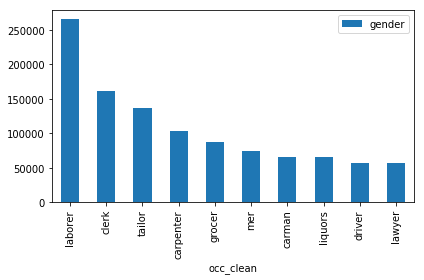

In [75]:
males_eth[['occ_clean', 'gender']].groupby(['occ_clean']).count().sort_values('gender',ascending=False)[0:10].plot(kind='bar')

In [90]:
males_eth['occ_clean'] = males_eth['occ_clean'].str.replace('merchantchant', 'merchant')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [91]:
top10_occupations = males_eth[['occ_clean', 'gender']].groupby(['occ_clean']).count().sort_values('gender',ascending=False)[0:10].index.tolist()

In [92]:
top10_occupations

['laborer',
 'clerk',
 'tailor',
 'carpenter',
 'grocer',
 'merchant',
 'carman',
 'liquors',
 'driver',
 'lawyer']

In [93]:
males_top10 = males_eth[males_eth['occ_clean'].isin(top10_occupations)]

In [94]:
occ_gb_year_males = males_top10[['occ_clean','validSince','gender']].groupby(['occ_clean','validSince']).count()
occ_gb_year_males_race = males_top10[['occ_clean','validSince','race']].groupby(['occ_clean','race']).count()

In [95]:
occ_gb_year_males.reset_index(inplace=True)
occ_gb_year_males_race.reset_index(inplace=True)

In [96]:
pivot_df_males = occ_gb_year_males.pivot(columns='validSince', index='occ_clean', values='gender')
pivot_df_males_race = occ_gb_year_males_race.pivot(columns='race', index='occ_clean', values='validSince')

In [97]:
pivot_df_males_race.rename(columns = {'Asian,GreaterEastAsian,EastAsian' : 'EastAsian',
                                'Asian,GreaterEastAsian,Japanese' : 'Japanese',
                                'Asian,IndianSubContinent' : 'IndianSubcontinent',
                               'GreaterAfrican,Africans' : 'Africans',
                               'GreaterEuropean,British' : 'British',
                               'GreaterEuropean,EastEuropean' : 'EastEuropean',
                               'GreaterEuropean,Jewish' : 'Jewish',
                               'GreaterEuropean,WestEuropean,French' : 'French',
                               'GreaterEuropean,WestEuropean,Germanic' : 'Germanic',
                               'GreaterEuropean,WestEuropean,Hispanic' : 'Hispanic',
                               'GreaterEuropean,WestEuropean,Italian' : 'Italian',
                               'GreaterEuropean,WestEuropean,Nordic' : 'Nordic'},inplace=True )

In [98]:
pivot_df_males_race.fillna(0,inplace=True)
pivot_df_males.fillna(0,inplace=True)

In [99]:
pivot_df_males_prop = pivot_df_males / pivot_df_males.sum(axis = 0)
pivot_df_males_race_prop = pivot_df_males_race / pivot_df_males_race.sum(axis = 0)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


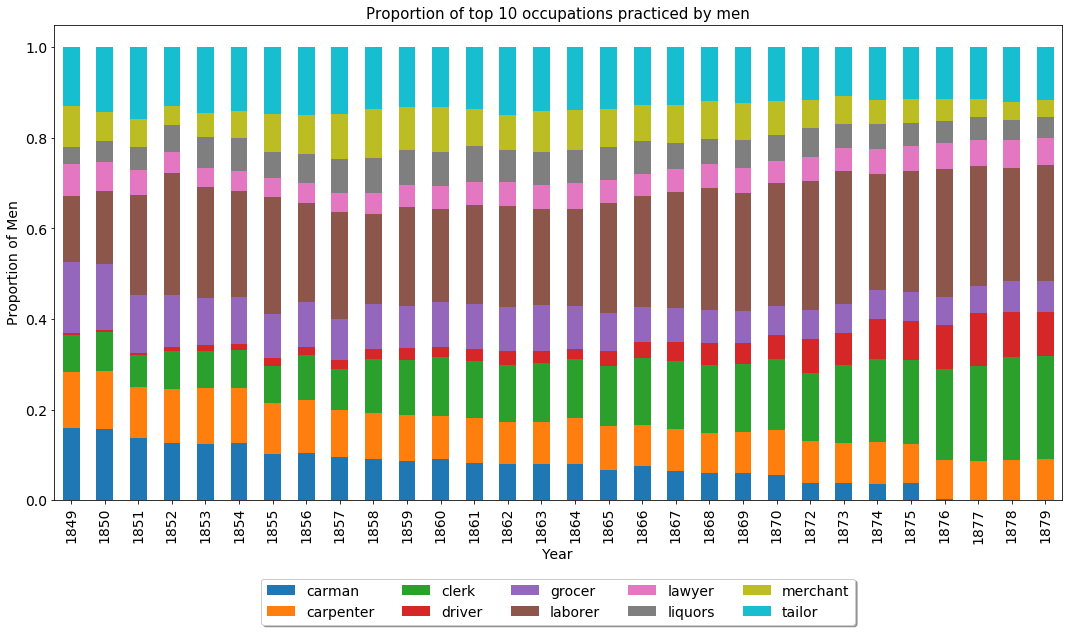

In [100]:
fig, ax =plt.subplots(figsize=(15,8))
box = ax.get_position()

pivot_df_males_prop.T.plot.bar(ax=ax,stacked=True,colormap='tab10')
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5,fontsize=14.0)
plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)

plt.title('Proportion of top 10 occupations practiced by men', fontsize=15.0)
plt.xlabel('Year',fontsize=14.0)
plt.ylabel('Proportion of Men',fontsize=14.0)
plt.savefig('genders_occupations_time_male.png')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


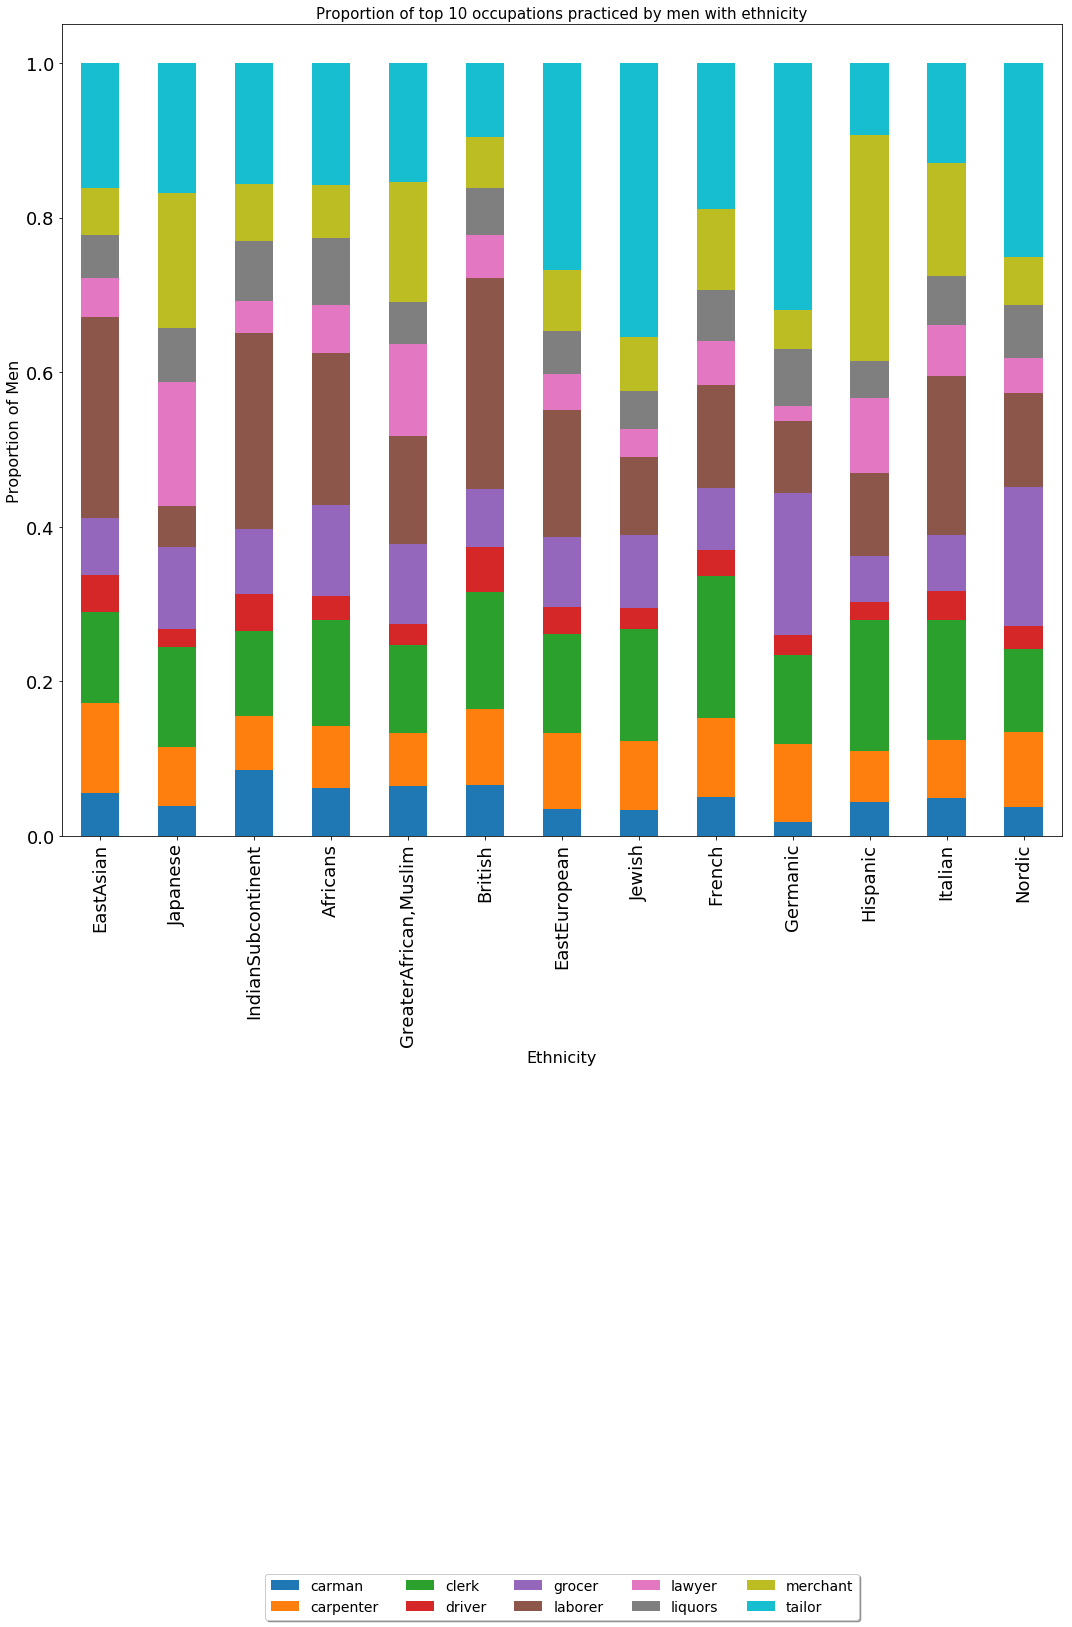

In [102]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
fig, ax =plt.subplots(figsize=(15,15))
box = ax.get_position()

pivot_df_males_race_prop.T.plot.bar(ax=ax,stacked=True,colormap='tab10')
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.9),
          fancybox=True, shadow=True, ncol=5,fontsize=14.0)
plt.xticks(fontsize=18.0)
plt.yticks(fontsize=18.0)

plt.title('Proportion of top 10 occupations practiced by men with ethnicity', fontsize=15.0)
plt.xlabel('Ethnicity',fontsize=16.0)
plt.ylabel('Proportion of Men',fontsize=16.0)
plt.savefig('genders_occupations_time_ethnicity_male.png')